### This notebook will be used for exploratory data analysis in order to get a better idea of what the house price data is showing and what patterns and trends are contained within.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import our data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
#print(train.columns)

Now for a cursory overview of the data held within the training set:

In [2]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Feature Selection
Let's see if we can improve upon the "lazy" way I've typically done feature selection in past projects.

### Method 1: "Intuition" - select features that we consider to be defining features of the house regardless of whether the data suggests that they are statistically significant or useful for the model
_Disclaimer: This method is not based on any data science principles and is really only what I use in order to quickly simplify the dataset._

The amount of data in the dataframe is currently overwhelming. If we're just looking for a simpler model to predict house price, we can take off most of the columns in the table and instead focus on the overall defining features of the house. These will most often be features that are shared by all houses, too (such as lot area, house condition, # bedrooms, etc.) so dropping the columns with minute details of the house will hopefully handle missing values in the data.

In [4]:
#train = train[["LotArea", "Utilities", "HouseStyle", "OverallCond", "YearBuilt", "LotShape", "CentralAir", "FullBath", "HalfBath", 
               #"BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "GarageCars"]]
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Method 2: ...Actual Feature Selection - where features are actually selected based on their usefulness in our dataset

The steps that will be followed for this method are:
- Remove features with high missing data %
- Remove features with low variation (will be less useful in predictive models)
- Simplify model by combining like features
- Compare features individually and rank features based off usefulness in our model.

Let's begin by finding which columns have missing data and dropping those from our training data.

In [5]:
missingValues = []
for column in train :
    if train[column].isna().sum() > 0:
        missingValues.append(train[column].name)
print(missingValues)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


Although it might seem a little extra to drop a column if only one item in the column was null, in order to decrease the overall size of the dataset we will still drop all of these columns from the dataset.

In [6]:
train = train.drop(columns=missingValues)
test = test.drop(columns=missingValues)
train.describe()
#we can see in the description below that we've successfully dropped 
#LotFrontage and Alley columns from the beginning columns of the dataframe,
#as well as the other columns we identified.

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Next we need to remove features with low variation in our table. This is a good idea because values that are mostly consistent across all 1,460 houses in our set will not be very helpful in identifying which features to build our model on for the best predictions.

There are a few ways to do this. Potentially we could:
- Find the average variation across all data and drop the columns that have lower variation than this. This would allow us to quickly scale down the size of our data once again.
- Find the variation values of each column individually and then drop n # of columns with the lowest variation.
- Separate the data into numeric and categorical data and drop some from each smaller set. Some categorical data in our set, such as LotShape, only have a couple of possible values and would return a lower variation than most numeric values, regardless of how useful it might potentially be in a model.

Going along with the third point above, using the built-in std()/var() functions to calculate variation in our dataframe's columns, we can easily find values for numeric data, but it does not calculate variance for categorical data. My strategy will be to first analyze only the numeric data and drop a certain number of columns after comparing the different variance values. 

In [7]:
variation = train.std(numeric_only=True)
print(variation)

Id                 421.610009
MSSubClass          42.300571
LotArea           9981.264932
OverallQual          1.382997
OverallCond          1.112799
YearBuilt           30.202904
YearRemodAdd        20.645407
BsmtFinSF1         456.098091
BsmtFinSF2         161.319273
BsmtUnfSF          441.866955
TotalBsmtSF        438.705324
1stFlrSF           386.587738
2ndFlrSF           436.528436
LowQualFinSF        48.623081
GrLivArea          525.480383
BsmtFullBath         0.518911
BsmtHalfBath         0.238753
FullBath             0.550916
HalfBath             0.502885
BedroomAbvGr         0.815778
KitchenAbvGr         0.220338
TotRmsAbvGrd         1.625393
Fireplaces           0.644666
GarageCars           0.747315
GarageArea         213.804841
WoodDeckSF         125.338794
OpenPorchSF         66.256028
EnclosedPorch       61.119149
3SsnPorch           29.317331
ScreenPorch         55.757415
PoolArea            40.177307
MiscVal            496.123024
MoSold               2.703626
YrSold    

In [8]:
#Sort variation from high to low standard deviation values.
variation.sort_values(ascending=False)

SalePrice        79442.502883
LotArea           9981.264932
GrLivArea          525.480383
MiscVal            496.123024
BsmtFinSF1         456.098091
BsmtUnfSF          441.866955
TotalBsmtSF        438.705324
2ndFlrSF           436.528436
Id                 421.610009
1stFlrSF           386.587738
GarageArea         213.804841
BsmtFinSF2         161.319273
WoodDeckSF         125.338794
OpenPorchSF         66.256028
EnclosedPorch       61.119149
ScreenPorch         55.757415
LowQualFinSF        48.623081
MSSubClass          42.300571
PoolArea            40.177307
YearBuilt           30.202904
3SsnPorch           29.317331
YearRemodAdd        20.645407
MoSold               2.703626
TotRmsAbvGrd         1.625393
OverallQual          1.382997
YrSold               1.328095
OverallCond          1.112799
BedroomAbvGr         0.815778
GarageCars           0.747315
Fireplaces           0.644666
FullBath             0.550916
BsmtFullBath         0.518911
HalfBath             0.502885
BsmtHalfBa

The results returned here seem to be easily explainable without a deep analysis. Data with high standard deviation such as price (which we would never drop even if it did have low variation), lot area, and above ground living area are categories that we could imagine would have high standard deviation because of how much they can potentially fluctuate from property to property. Additionally, these are features of houses that we typically think of as defining characteristics that would be hard to drop from our data entirely (not to go back to my unsound "method" of intuitively feature selecting) even if they did have low variation here.

The values that have low standard deviation, such as number of kitchens above grade and number of half bathrooms in the basement, are house features that probably would stay relatively the same (mean number of kitches is almost certainly close to 1) and so we can likely drop them with some certainty that we'd not be losing important data.

When it comes to selecting the number of columns to drop, there seem to be a few distinct "drops" in standard deviation in the above series. First from a value of 9,981 to 525, but dropping all values with standard deviation 525 or less would only leave us with two numeric values, not enough to get a deep prediction on house price. Other notable drops in variation occur between 386->213, 125->66, and 20->2. To leave us with still a decent amount of numeric data, I will select the drop from 125->66, and drop everything below and including open porch square footage. This is certainly not objectively the best choice to make (if there even is one), but I thought it'd be clearer for me to make my choice based off these noticeable jumps in variation so as not to justify why we should keep "MSSubClass" in our data but not "PoolArea", when their variations are very similar.

In [9]:
#Check mean number of kitchens, as mentioned earlier (just for fun, we will drop regardless)
print(train["KitchenAbvGr"].mean()) #very close to 1!!

1.0465753424657533


In [10]:
#Create list of columns to drop
lowVariation = variation[variation.between(0,67)]
print(lowVariation)

MSSubClass       42.300571
OverallQual       1.382997
OverallCond       1.112799
YearBuilt        30.202904
YearRemodAdd     20.645407
LowQualFinSF     48.623081
BsmtFullBath      0.518911
BsmtHalfBath      0.238753
FullBath          0.550916
HalfBath          0.502885
BedroomAbvGr      0.815778
KitchenAbvGr      0.220338
TotRmsAbvGrd      1.625393
Fireplaces        0.644666
GarageCars        0.747315
OpenPorchSF      66.256028
EnclosedPorch    61.119149
3SsnPorch        29.317331
ScreenPorch      55.757415
PoolArea         40.177307
MoSold            2.703626
YrSold            1.328095
dtype: float64


In [11]:
train = train.drop(columns=lowVariation.keys())
test = test.drop(columns=lowVariation.keys())

In [12]:
train.head()

,Id,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GrLivArea,KitchenQual,Functional,GarageArea,PavedDrive,WoodDeckSF,MiscVal,SaleType,SaleCondition,SalePrice
0,1,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,1710,Gd,Typ,548,Y,0,0,WD,Normal,208500
1,2,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,1262,TA,Typ,460,Y,298,0,WD,Normal,181500
2,3,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,1786,Gd,Typ,608,Y,0,0,WD,Normal,223500
3,4,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,1717,Gd,Typ,642,Y,0,0,WD,Abnorml,140000
4,5,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,2198,Gd,Typ,836,Y,192,0,WD,Normal,250000


Now to examine the categorical data and find a way to better represent variation. First we'll store all the categorical data into a new dataframe.

In [13]:
catData = train.loc[:,train.dtypes==object]
catData.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

Let's write a function to take in one column at a time and count the number of times each value occurs in that column. If there is an even distribution among these answers, we can roughly say there is a high variation, while a low variation would correspond to a very high number of houses all having the same value for a categorical data type

In [14]:
#creates a dictionary that hold the counts of each value for a given categorical data type
def countDataValues(df, colName) :
    #access this column as a series
    col = pd.Series(df[colName])
    #create a dictionary that will store data values and corresponding counts
    counts = {"total": 0} #will also store total number of entries
    #iterate through the series to fill the dict
    for value in col :
        if value in counts :
            counts[value] += 1
        else :
            counts[value] = 1
        counts["total"] += 1
    return counts

Now let's call this function on all one column to test it.

In [15]:
MSZoningDict = countDataValues(catData, "MSZoning")
print(MSZoningDict)

{'total': 1460, 'RL': 1151, 'RM': 218, 'C (all)': 10, 'FV': 65, 'RH': 16}


So we see that 1151/1460 houses have the same "RL" value. We can probably conclude this has low variation, but first we should compare these results with others in catData.

In [16]:
for (colName, colData) in catData.items():
    dict = countDataValues(catData, colName)
    print(colName, ": ", dict)

MSZoning :  {'total': 1460, 'RL': 1151, 'RM': 218, 'C (all)': 10, 'FV': 65, 'RH': 16}
Street :  {'total': 1460, 'Pave': 1454, 'Grvl': 6}
LotShape :  {'total': 1460, 'Reg': 925, 'IR1': 484, 'IR2': 41, 'IR3': 10}
LandContour :  {'total': 1460, 'Lvl': 1311, 'Bnk': 63, 'Low': 36, 'HLS': 50}
Utilities :  {'total': 1460, 'AllPub': 1459, 'NoSeWa': 1}
LotConfig :  {'total': 1460, 'Inside': 1052, 'FR2': 47, 'Corner': 263, 'CulDSac': 94, 'FR3': 4}
LandSlope :  {'total': 1460, 'Gtl': 1382, 'Mod': 65, 'Sev': 13}
Neighborhood :  {'total': 1460, 'CollgCr': 150, 'Veenker': 11, 'Crawfor': 51, 'NoRidge': 41, 'Mitchel': 49, 'Somerst': 86, 'NWAmes': 73, 'OldTown': 113, 'BrkSide': 58, 'Sawyer': 74, 'NridgHt': 77, 'NAmes': 225, 'SawyerW': 59, 'IDOTRR': 37, 'MeadowV': 17, 'Edwards': 100, 'Timber': 38, 'Gilbert': 79, 'StoneBr': 25, 'ClearCr': 28, 'NPkVill': 9, 'Blmngtn': 17, 'BrDale': 16, 'SWISU': 25, 'Blueste': 2}
Condition1 :  {'total': 1460, 'Norm': 1260, 'Feedr': 81, 'PosN': 19, 'Artery': 48, 'RRAe': 11,

Unfortunately it seems many of these columns have a low variation, with many having a data value that occurred over 1000 of the 1460 possible houses. If we drop the columns that have this property, and only keep columns in our data where no count exceeds 1000, we can greatly reduce the size of our dataset once more and still have some level of variation in these columns.

In [17]:
#create a list of columns to drop (easier to write manually)
highVarCols = ["LotShape", "Neighborhood", "HouseStyle", "Exterior1st", "Exterior2nd", "ExterQual", "Foundation", "HeatingQC", "KitchenQual"]
lowVarCols = []
for(colName, colData) in catData.items():
    if not colName in highVarCols:
        lowVarCols.append(colName)
#drop these columns from train
train = train.drop(columns=lowVarCols)
test = test.drop(columns=lowVarCols)

In [18]:
#See which variables we have left in train
train.columns

Index(['Id', 'LotArea', 'LotShape', 'Neighborhood', 'HouseStyle',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'Foundation', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'KitchenQual', 'GarageArea', 'WoodDeckSF',
       'MiscVal', 'SalePrice'],
      dtype='object')

We have reduced our overly complex dataset nicely down to only the most essential and statistically significant (we hope) house qualities. The only remaining step that seems to be necessary is to analyze some related columns to see if we could combine, add, or remove any final features. This will help organize the data visualizations that will be done later. In particular, it seems like a good idea to find a way to combine or drop the separate basement information columns because those all deal with a very niche aspect of the house - the basement square footage. Let's take a closer look at the data descriptions for these columns in the provided text file:
- BsmtFinSF1: "Type 1 finished square feet"
- BsmtFinSF2: "Type 2 finished square feet"
- BsmtUnfSF: "Unfinished square feet of basement area"
- TotalBsmtSF: "Total square feet of basement area"

The descriptions for BsmtFinSF 1 and 2 columns is a bit unclear, but upon a closer look into our original training dataset, it seems that a house's basement was marked to have two different "types" if some of it was left unfinished, or even finished in a different way from other areas of the basement. There seems to be a lot of variation between houses' basement sizes and their types which could potentially be useful for prediction, but a potential problem occurs here because the majority of the houses have recorded a 0 in the BsmtFinSF2 column, which means either the house has no basement or it has only one type, thus the only meaningful data is stored in the BsmtFinSF1 column. We nearly dropped BsmtFinSF2 already, but it happened to be the column used as the exact cutoff between having a variation that is too low versus high enough.

Seeing as how we've also removed the categorical columns "BsmtFinType1" and "BsmtFinType2" from our dataset for having low variation, there doesn't seem to be an easy way to interpret the difference in basement types and how they might be significant in our model, so instead I will choose to focus on larger properties of the house basements. Even if we drop BsmtFinSF1 and BsmtFinSF2, we can still get a good idea of the total square footage of the house and how much of that square footage is unfinished from the BsmtUnfSF and TotalBsmtSF columns. We could also subtract the unfinished square footage from the total amount to generate a new column of finished square footage.

In [19]:
train = train.drop(columns=["BsmtFinSF1", "BsmtFinSF2"])
test = test.drop(columns=["BsmtFinSF1", "BsmtFinSF2"])

In [20]:
#add a new feature that will still give us lots of basement information
train["BsmtFinSF"] = train["TotalBsmtSF"] - train["BsmtUnfSF"]
test["BsmtFinSF"] = test["TotalBsmtSF"] - test["BsmtUnfSF"]
print(train["BsmtFinSF"])

0        706
1        978
2        486
3        216
4        655
        ... 
1455       0
1456     953
1457     275
1458    1078
1459    1120
Name: BsmtFinSF, Length: 1460, dtype: int64


In [21]:
train.head()

,Id,LotArea,LotShape,Neighborhood,HouseStyle,Exterior1st,Exterior2nd,ExterQual,Foundation,BsmtUnfSF,...,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,KitchenQual,GarageArea,WoodDeckSF,MiscVal,SalePrice,BsmtFinSF
0,1,8450,Reg,CollgCr,2Story,VinylSd,VinylSd,Gd,PConc,150,...,Ex,856,854,1710,Gd,548,0,0,208500,706
1,2,9600,Reg,Veenker,1Story,MetalSd,MetalSd,TA,CBlock,284,...,Ex,1262,0,1262,TA,460,298,0,181500,978
2,3,11250,IR1,CollgCr,2Story,VinylSd,VinylSd,Gd,PConc,434,...,Ex,920,866,1786,Gd,608,0,0,223500,486
3,4,9550,IR1,Crawfor,2Story,Wd Sdng,Wd Shng,TA,BrkTil,540,...,Gd,961,756,1717,Gd,642,0,0,140000,216
4,5,14260,IR1,NoRidge,2Story,VinylSd,VinylSd,Gd,PConc,490,...,Ex,1145,1053,2198,Gd,836,192,0,250000,655


And that completes our feature selection! Besides the necessary Id and SalePrice columns, we have reduced our dataframe down to 19 of the most essential property characteristics. In this section I never utilized the strategy of predicting house price using one predictor at a time (likely just using linear regression) and comparing those results, but I could've done that if I desired an even smaller end training set.

## Data Visualization
Although we already did once earlier, separating our data into numeric and categorical data will make data visualization much more straightforward. As the .describe() method automaticall grabs the numeric columns in our set, we can find that section of the dataset as follows:

In [22]:
train.describe() #also printing out the describe function to reference as needed

,Id,LotArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,MiscVal,SalePrice,BsmtFinSF
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,10516.828082,567.240411,1057.429452,1162.626712,346.992466,1515.463699,472.980137,94.244521,43.489041,180921.195890,490.189041
std,421.610009,9981.264932,441.866955,438.705324,386.587738,436.528436,525.480383,213.804841,125.338794,496.123024,79442.502883,476.103307
min,1.000000,1300.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,34900.000000,0.000000
25%,365.750000,7553.500000,223.000000,795.750000,882.000000,0.000000,1129.500000,334.500000,0.000000,0.000000,129975.000000,0.000000
50%,730.500000,9478.500000,477.500000,991.500000,1087.000000,0.000000,1464.000000,480.000000,0.000000,0.000000,163000.000000,465.000000
75%,1095.250000,11601.500000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,576.000000,168.000000,0.000000,214000.000000,790.250000
max,1460.000000,215245.000000,2336.000000,6110.000000,4692.000000,2065.000000,5642.000000,1418.000000,857.000000,15500.000000,755000.000000,5644.000000


In [23]:
train.describe().columns

Index(['Id', 'LotArea', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'GarageArea', 'WoodDeckSF', 'MiscVal', 'SalePrice',
       'BsmtFinSF'],
      dtype='object')

In [24]:
trainNum = train[["LotArea", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GrLivArea", "GarageArea", "WoodDeckSF",
                 "MiscVal", "SalePrice", "BsmtFinSF"]]
#assume all the rest are categorical variables
trainCat = train[["LotShape", "Neighborhood", "HouseStyle", "Exterior1st", "Exterior2nd", "ExterQual", "Foundation", "HeatingQC", "KitchenQual"]]

We'll make some simple histograms for the numeric variables to get a visual of what their distributions are like.

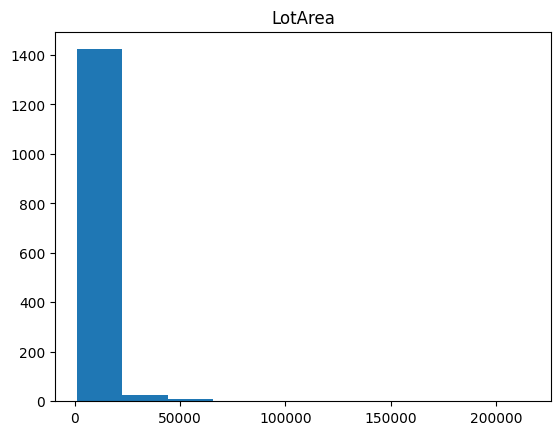

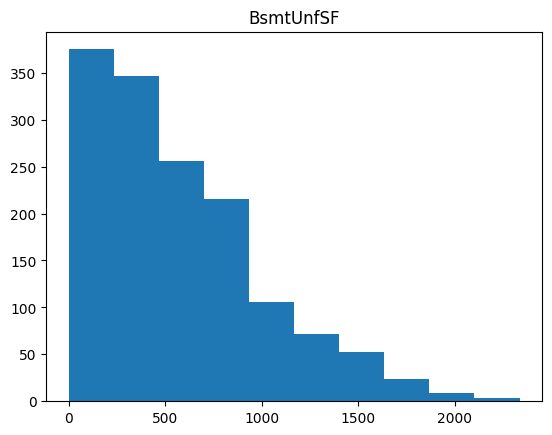

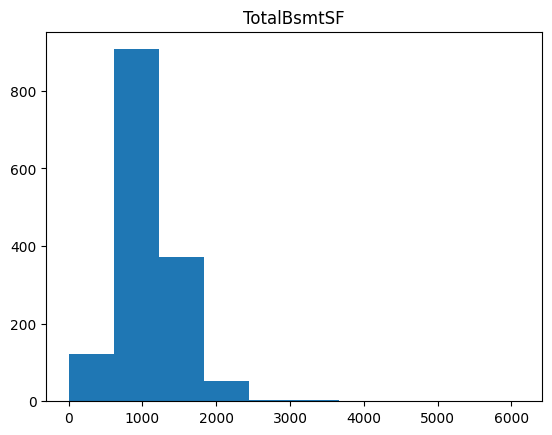

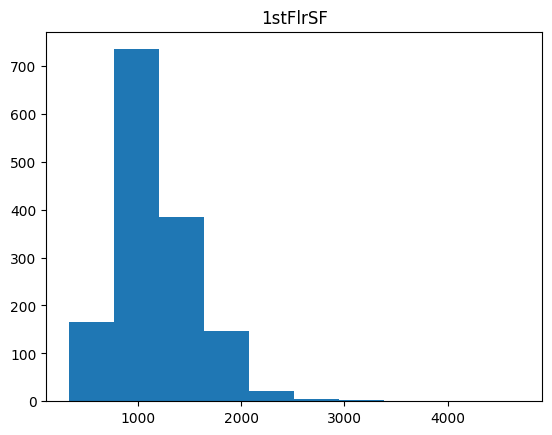

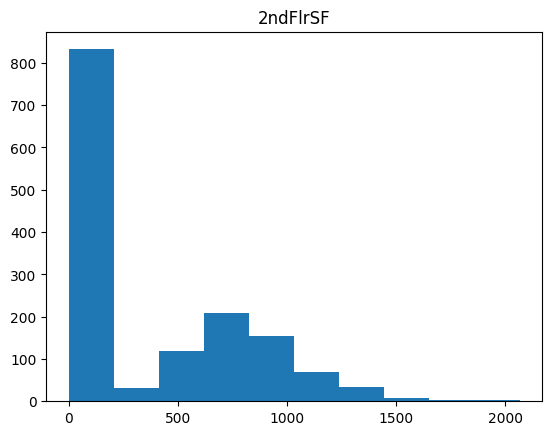

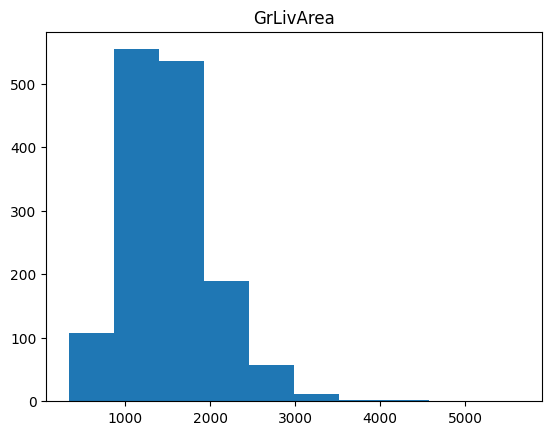

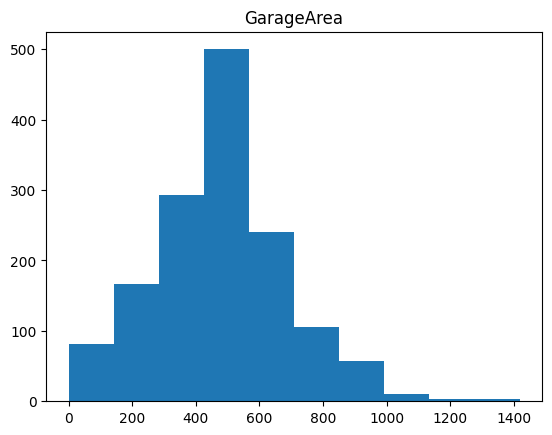

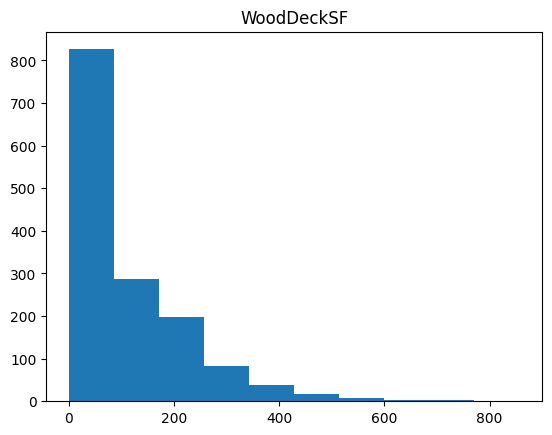

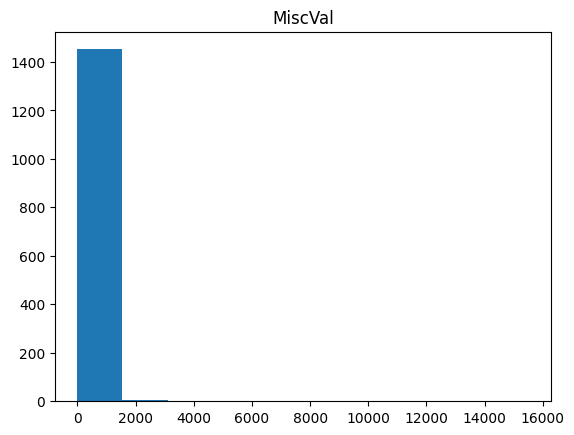

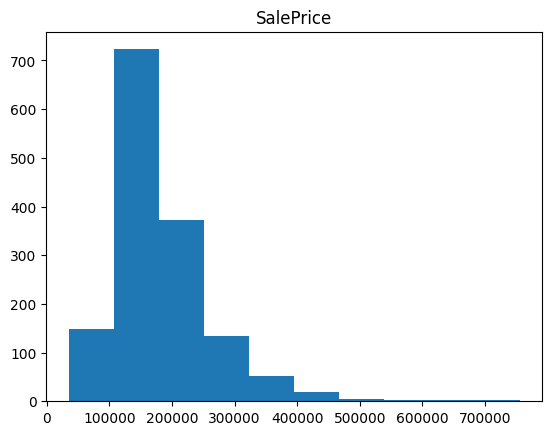

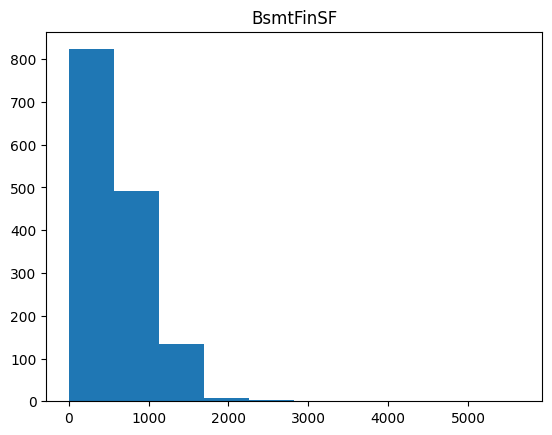

In [25]:
for i in trainNum :
    plt.hist(trainNum[i])
    plt.title(i)
    plt.show()

Here are a few things that stand out to me in these histograms that, when combined with the data description info, give us a better idea of the data we're working with.
- An awful lot of the distributions are skewed right, such as lot area, finished and unfinished basement sf., wood deck sf., and sale price. This likely indicates that a small number of houses in the dataset are significantly higher quality (and therefore more expensive) than the average house in the set. Houses that only the wealthiest people could afford will probably be outliers in metrics like lot area, deck square footage and other added property features, and sale price.
- In a few categories it's clear that a majority of houses actually don't have any data to report, which results in a spike immediately at the y-axis. Second floor sf., wood deck sf., and misc. value are extra house features that a large number of homes don't have at all. Looking at the above data description table shows that for some of these categories the 25th, 50th or even 75th percentile records a zero value, meaning the house is entirely missing a second floor, or wood deck, etc.
- An interesting pattern emerges among the basement square footage histograms. Although both the finished and unfinished square footage plots are skewed right, the total basement square footage is relatively normally distributed.

Next I will generate a correlation heatmap through seaborn to get a quick idea of how correlated the numerical data might be.

<AxesSubplot: >

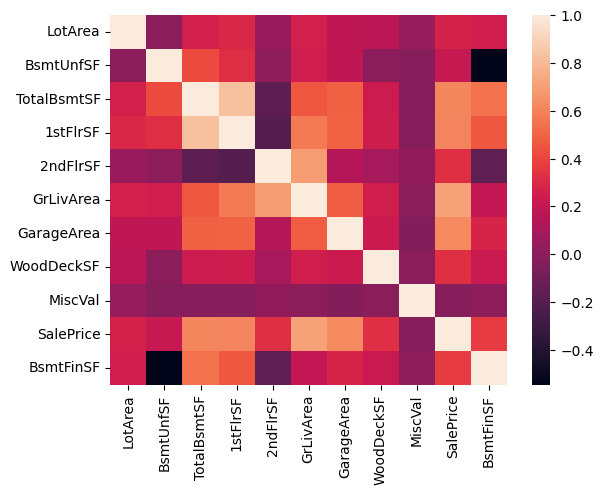

In [26]:
sns.heatmap(trainNum.corr())

A lot of the correlations seem to be very weak, but we can see that some of the strongest correlations are between 1stFlorSF and TotalBsmUnfSF, as well as between SalePrice and a few different categories - GrLivArea, TotalBsmtUnf, GarageArea, and 1stFlrSF. Since we are ultimately trying to predict sale price, it is a good sign that a few of the data categories have relatively strong correlations here. 

We can also see that BsmtUnfSF and BsmtFinSF have a moderately strong negative correlation from this heatmap, which may begin to offer an explanation to why the basement square footage plots were so interesting before.

## Building Our Model Using Sci-Kit Learn Library
For the purpose of keeping this model relatively easy to understand, I'll just predict sale price based on two machine learning models that I know the most about - linear regression and random forests. We'll create and test both of these methods and ultimately make a Kaggle submission based on which has the lowest error. Note that currently I have not included categorical variables in these models because sci-kit learn doesn't support the use of them. This would certainly be an area for further exploration in this project.

First I'll create a random forest model and evaluate it. We'll also need to prep the data a little more to do that. Then create a simple linear regression (using least squares regression) model.

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

#prep data - need training inputs and output (sale price) as well as
#testing inputs (that match the columns of train).
cols = trainNum.columns #only using numeric variables here
cols = cols.drop("SalePrice")
X = train[cols]
y = train.SalePrice
#split data into training and validation data to test model
trainX, valX, trainPrice, valPrice = train_test_split(X, y, random_state=0)

forestModel = RandomForestRegressor(random_state = 1)
forestModel.fit(trainX, trainPrice)
forestPreds = forestModel.predict(valX)
print("Validation MAE for Random Forest model: ", mean_absolute_error(forestPreds,valPrice))

#Now create a linear regression model and find its MAE
from sklearn import linear_model
linearModel = linear_model.LinearRegression()
linearModel.fit(trainX, trainPrice)
linearPreds = linearModel.predict(valX)
print("Validation MAE for Linear Regression model: ", mean_absolute_error(linearPreds, valPrice))

Validation MAE for Random Forest model:  23323.63974063927
Validation MAE for Linear Regression model:  29001.19773336623


Both models perform relatively similarly, but as the random forest model's mean absolute error is lower, I'll use that to predict final sale prices for the testing data originally imported at the start of this notebook, and make a Kaggle competition submission.

In [38]:
#to prepare the test set I have gone back through this notebook and altered
#the same columns as the training set each time anything was dropped or added
testX = test[cols] #select only numeric columns we're using in the model.

#The final model we use to predict the test data needs as much training data as 
#possible, so use all of trainNum and not just trainX
finalModel = RandomForestRegressor(random_state = 1)
finalModel.fit(X.values, y) #use X.values to avoid later warning for .predict

RandomForestRegressor(random_state=1)

But unfortunately once we try to make predictions with this model, we run into an error. One or more of the features we selected has missing values in the testing set. There are a few options for how to deal with this, but as to avoid removing entire features and re-testing models, I will use a simple imputation method. Here all of the missing values are filled in with the mean value, a primitive but decently effective solution.

In [39]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
testX = imputer.fit_transform(testX)

#Now we can make predictions for our submission.
finalPreds = finalModel.predict(testX)
submission = pd.DataFrame({"Id":test.Id, "SalePrice": finalPreds})
submission.to_csv("submission.csv", index=False)

And that concludes this notebook, with a complete and correctly-formatted csv submission file for the Housing Prices Kaggle Competition.